## Problem Statement

An automobile parts manufacturing company has collected data on transactions for 3 years. They do not have any in-house data science team, thus they have hired you as their consultant. Your job is to use your data science skills to find the underlying buying patterns of the customers, provide the company with suitable insights about their customers, and recommend customized marketing strategies for different segments of customers. 

For this project, we can start by performing exploratory data analysis (EDA) on the transaction data collected by the automobile parts manufacturing company. Here's a high-level plan of how we can approach this project:

1. **Data Cleaning and Preprocessing**:
   - Check for missing values, duplicates, and data inconsistencies.
   - Convert data types if necessary (e.g., date columns to datetime).
   - Explore the distribution of numerical variables and handle outliers if needed.
   - Encode categorical variables for further analysis.

2. **Exploratory Data Analysis (EDA)**:
   - Explore the distribution of sales, quantity ordered, and other relevant variables.
   - Analyze trends over time (e.g., monthly or yearly sales trends).
   - Identify the top-selling products, customer segments, and geographical regions.
   - Look for correlations between variables to identify potential patterns.

3. **Customer Segmentation**:
   - Use clustering algorithms (e.g., K-means clustering) to segment customers based on their purchasing behavior, such as frequency, recency, and monetary value (RFM analysis).
   - Analyze the characteristics of each customer segment to understand their preferences and behaviors.

4. **Market Basket Analysis**:
   - Conduct market basket analysis to identify frequently co-purchased products.
   - Determine association rules (e.g., using Apriori algorithm) to understand which products are commonly bought together.

5. **Recommendation System**:
   - Build a recommendation system to suggest relevant products to customers based on their past purchase history and similarities with other customers.

6. **Customized Marketing Strategies**:
   - Develop customized marketing strategies for different customer segments based on their characteristics and preferences.
   - Personalize marketing campaigns, promotions, and product recommendations to target specific customer segments effectively.

7. **Evaluation and Iteration**:
   - Evaluate the effectiveness of the implemented strategies and measure key performance indicators (KPIs) such as customer retention, sales growth, and customer satisfaction.
   - Iterate on the strategies based on the feedback and insights gained from the evaluation process.

Throughout the project, effective communication with the company stakeholders is crucial. Regular updates, presentations, and reports should be provided to keep them informed about the progress and findings of the analysis. Additionally, collaboration with domain experts within the company can provide valuable insights and domain knowledge to guide the analysis and decision-making process.

Column Name	Description
ORDERNUMBER	This column represents the unique identification number assigned to each order.
QUANTITYORDERED	It indicates the number of items ordered in each order.
PRICEEACH	This column specifies the price of each item in the order.
ORDERLINENUMBER	It represents the line number of each item within an order.
SALES	This column denotes the total sales amount for each order, which is calculated by multiplying the quantity ordered by the price of each item.
ORDERDATE	It denotes the date on which the order was placed.
DAYS_SINCE_LASTORDER	This column represents the number of days that have passed since the last order for each customer. It can be used to analyze customer purchasing patterns.
STATUS	It indicates the status of the order, such as "Shipped," "In Process,"  "Cancelled," "Disputed," "On Hold," or "Resolved"
PRODUCTLINE	This column specifies the product line categories to which each item belongs. 
MSRP	 It stands for Manufacturer's Suggested Retail Price and represents the suggested selling price for each item.
PRODUCTCODE	This column represents the unique code assigned to each product.
CUSTOMERNAME	It denotes the name of the customer who placed the order.
PHONE	This column contains the contact phone number for the customer.
ADDRESSLINE1	It represents the first line of the customer's address.
CITY	This column specifies the city where the customer is located.
POSTALCODE	 It denotes the postal code or ZIP code associated with the customer's address.
COUNTRY	This column indicates the country where the customer is located.
CONTACTLASTNAME	It represents the last name of the contact person associated with the customer.
CONTACTFIRSTNAME	This column denotes the first name of the contact person associated with the customer.
DEALSIZE	It indicates the size of the deal or order, which are the categories "Small," "Medium," or "Large."


Load Required Libraries

In [2]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt   
import seaborn as sns

In [3]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.23.5
1.5.3
0.12.2


## Importing data

In [4]:
# reading the CSV file into pandas dataframe
df = pd.read_excel(r"C:\Users\lavan\Downloads\Sales_Data.xlsx")

## View and describe the data

View the top 5 records

In [44]:
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,1970-01-01 00:00:00.000043155,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,1970-01-01 00:00:00.000043227,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,1970-01-01 00:00:00.000043282,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,1970-01-01 00:00:00.000043337,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,1970-01-01 00:00:00.000043401,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


View the bottom 5 records

In [7]:
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2742,10350,20,112.22,15,2244.40,43801,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,43861,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,43891,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,43918,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small
2746,10414,47,65.52,9,3079.44,43957,2772,On Hold,Ships,54,S72_3212,Gifts4AllAges.com,6175559555,8616 Spinnaker Dr.,Boston,51003,USA,Yoshido,Juri,Medium


Shape

In [6]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])


no. of rows:  2747 
no. of columns:  20


Retreive the list of fields along with their data type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   int64  
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

ORDERDATE: Represents the date of the order. It's currently represented as an integer, but ideally, it should be converted to a datetime data type (datetime64) for easier handling and analysis of dates.

In [25]:
# Convert 'ORDERDATE' column to datetime data type
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [50]:
# List of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the list of numerical columns
print("List of numerical variables:")
print(numerical_columns)


List of numerical variables:
['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'DAYS_SINCE_LASTORDER', 'MSRP']


In [51]:
# List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical columns
print("List of categorical variables:")
print(categorical_columns)


List of categorical variables:
['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']


In [10]:
df['ORDERNUMBER'].unique()

array([10107, 10121, 10134, 10145, 10168, 10180, 10188, 10211, 10223,
       10237, 10251, 10263, 10275, 10285, 10299, 10309, 10318, 10329,
       10341, 10361, 10375, 10388, 10403, 10417, 10103, 10112, 10126,
       10140, 10150, 10163, 10174, 10183, 10194, 10206, 10215, 10228,
       10245, 10258, 10270, 10280, 10291, 10304, 10312, 10322, 10347,
       10357, 10369, 10391, 10411, 10424, 10120, 10210, 10236, 10298,
       10308, 10339, 10374, 10402, 10362, 10105, 10119, 10129, 10143,
       10155, 10167, 10178, 10186, 10197, 10222, 10248, 10261, 10273,
       10283, 10295, 10307, 10316, 10325, 10337, 10350, 10359, 10373,
       10395, 10400, 10414, 10114, 10164, 10175, 10207, 10217, 10229,
       10259, 10281, 10305, 10313, 10334, 10370, 10425, 10108, 10122,
       10135, 10147, 10169, 10181, 10191, 10203, 10225, 10238, 10253,
       10266, 10276, 10287, 10300, 10310, 10320, 10363, 10389, 10419,
       10117, 10127, 10142, 10153, 10165, 10176, 10185, 10196, 10208,
       10220, 10231,

In [12]:
df['QUANTITYORDERED'].unique()

array([30, 34, 41, 45, 36, 29, 48, 37, 23, 28, 46, 42, 20, 21, 24, 66, 26,
       38, 47, 35, 32, 40, 50, 39, 27, 22, 44, 31, 33, 49, 43, 56, 25, 64,
       19, 12, 55, 10, 54, 97, 61, 51, 59, 76,  6, 15, 60, 65, 58, 16, 70,
       13, 18, 52, 11, 62, 85, 77], dtype=int64)

In [13]:
df['PRICEEACH'].unique()

array([95.7 , 81.35, 94.74, ..., 55.69, 97.16, 62.24])

In [15]:
df['ORDERLINENUMBER'].unique()

array([ 2,  5,  6,  1,  9, 14,  7, 13, 12,  4, 11,  8,  3, 10, 15, 17, 16,
       18], dtype=int64)

In [16]:
df['SALES'].unique()

array([2871.  , 2765.9 , 3884.34, ..., 3978.51, 5417.57, 2116.16])

In [17]:
df['DAYS_SINCE_LASTORDER'].unique()

array([ 828,  757,  703, ..., 2955, 2934, 2772], dtype=int64)

In [18]:
df['MSRP'].unique()

array([ 95, 214, 118, 193, 136, 147, 194, 207, 150, 151, 117, 173,  79,
       115, 116, 141, 102,  53, 124, 157, 170,  77, 142, 163,  60, 122,
       127,  84, 168, 132, 101,  62,  86, 104, 169, 100,  80,  99, 146,
       105, 143,  92,  87, 121,  50, 148,  71,  73,  57, 112, 109,  33,
        76,  44,  69,  90,  35,  68,  37,  88,  85,  61,  65, 107,  83,
       140,  41,  97,  72,  96,  40,  54,  64,  43,  58,  81,  66,  91,
        74,  49], dtype=int64)

In [ ]:
'''# List of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numerical column
for column in numerical_columns:
    # Get unique values for the current column
    unique_values = df[column].unique()
    
    # Display column name and unique values
    print(f"Unique values for {column}:")
    print(unique_values)
    print()
'''

In [21]:
# List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Loop through each categorical column
for column in categorical_columns:
    # Calculate value counts for the current column
    value_counts = df[column].value_counts()
    
    # Display column name and value counts
    print(f"Value counts for {column}:")
    print(value_counts)
    print()


Value counts for STATUS:
Shipped       2541
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

Value counts for PRODUCTLINE:
Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: PRODUCTLINE, dtype: int64

Value counts for PRODUCTCODE:
S18_3232    51
S32_2509    28
S50_1392    28
S24_2840    28
S24_1444    28
            ..
S24_2887    22
S18_2248    21
S18_1749    21
S18_4409    21
S24_3969    21
Name: PRODUCTCODE, Length: 109, dtype: int64

Value counts for CUSTOMERNAME:
Euro Shopping Channel           259
Mini Gifts Distributors Ltd.    180
Australian Collectors, Co.       55
La Rochelle Gifts                53
AV Stores, Co.                   51
                               ... 
Microscale Inc.                  10
Royale Belge                      8
Auto-Moto Classics Inc.           8
Atelie

Missing Values

In [23]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

Checking for Duplicates

In [24]:
# Are there any duplicates
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


## Data Visualization

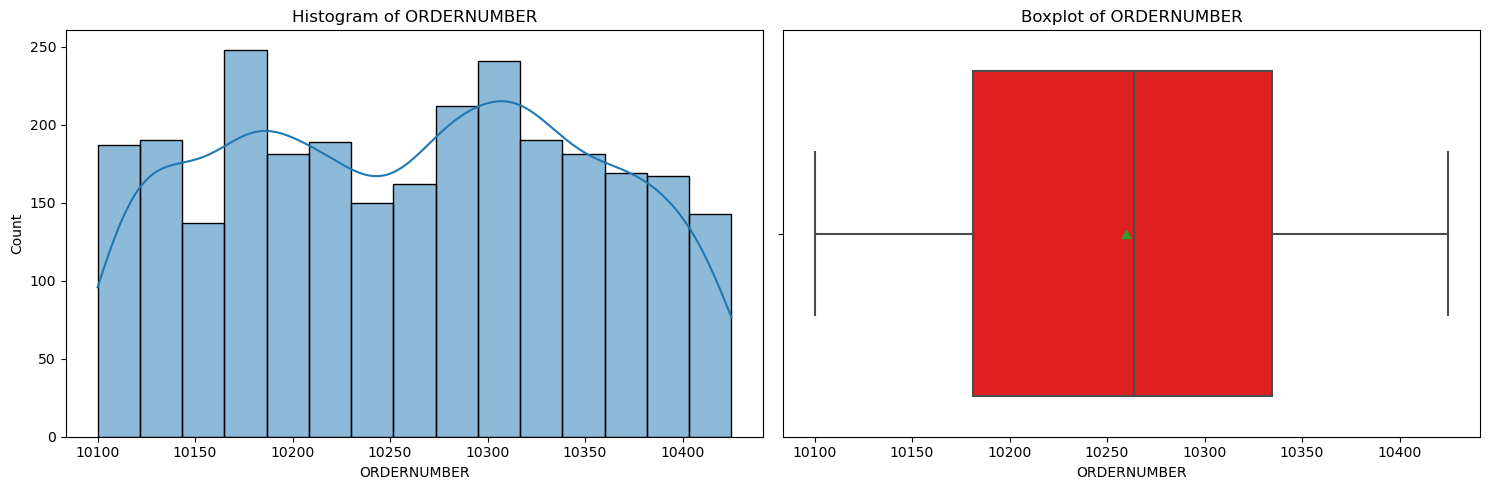

In [35]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot histogram
sns.histplot(df['ORDERNUMBER'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of ORDERNUMBER')

# Plot boxplot
sns.boxplot(x=df['ORDERNUMBER'], ax=axes[1], showmeans=True, color='red')
axes[1].set_title('Boxplot of ORDERNUMBER')

plt.tight_layout()
plt.show()

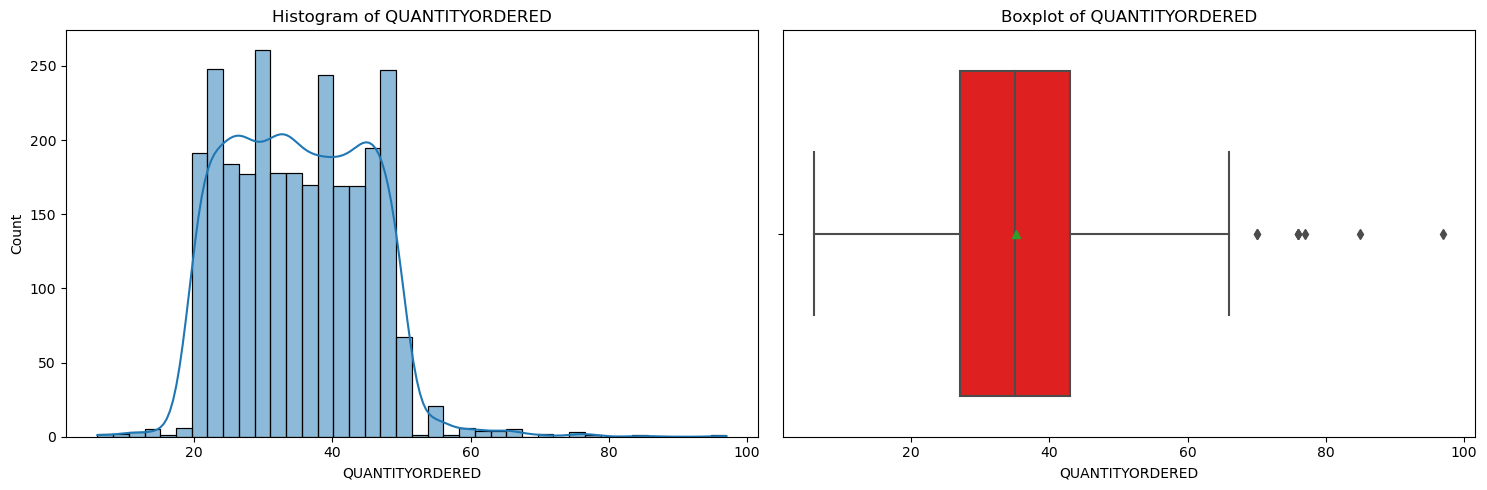

In [36]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot histogram
sns.histplot(df['QUANTITYORDERED'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of QUANTITYORDERED')

# Plot boxplot
sns.boxplot(x=df['QUANTITYORDERED'], ax=axes[1], showmeans=True, color='red')
axes[1].set_title('Boxplot of QUANTITYORDERED')

plt.tight_layout()
plt.show()

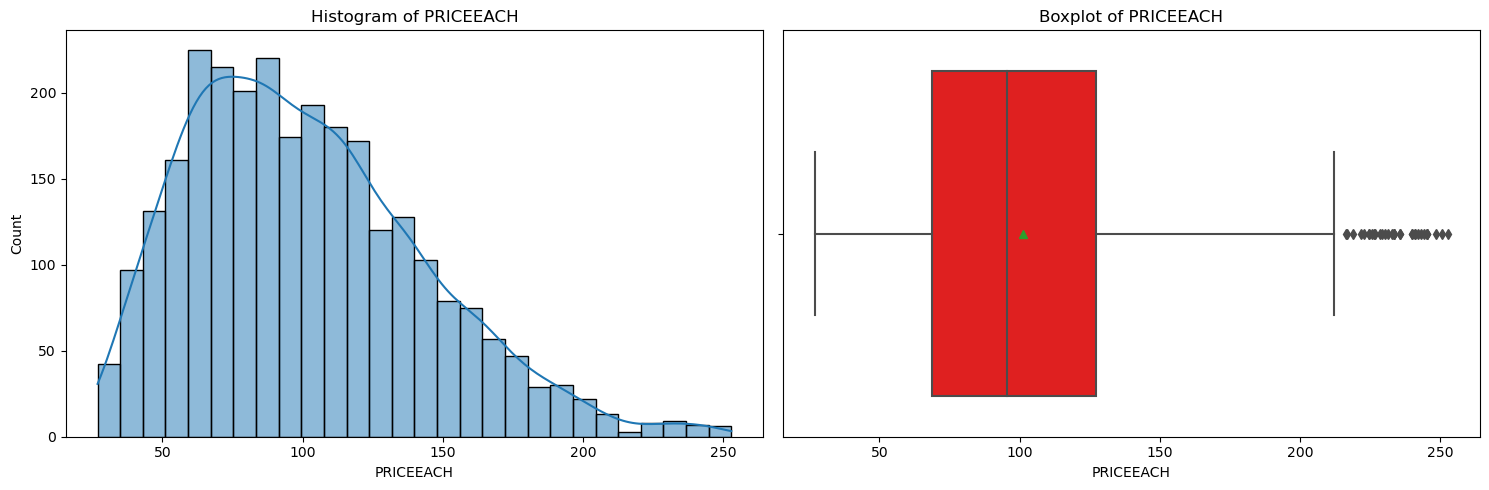

In [37]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot histogram
sns.histplot(df['PRICEEACH'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of PRICEEACH')

# Plot boxplot
sns.boxplot(x=df['PRICEEACH'], ax=axes[1], showmeans=True, color='red')
axes[1].set_title('Boxplot of PRICEEACH')

plt.tight_layout()
plt.show()

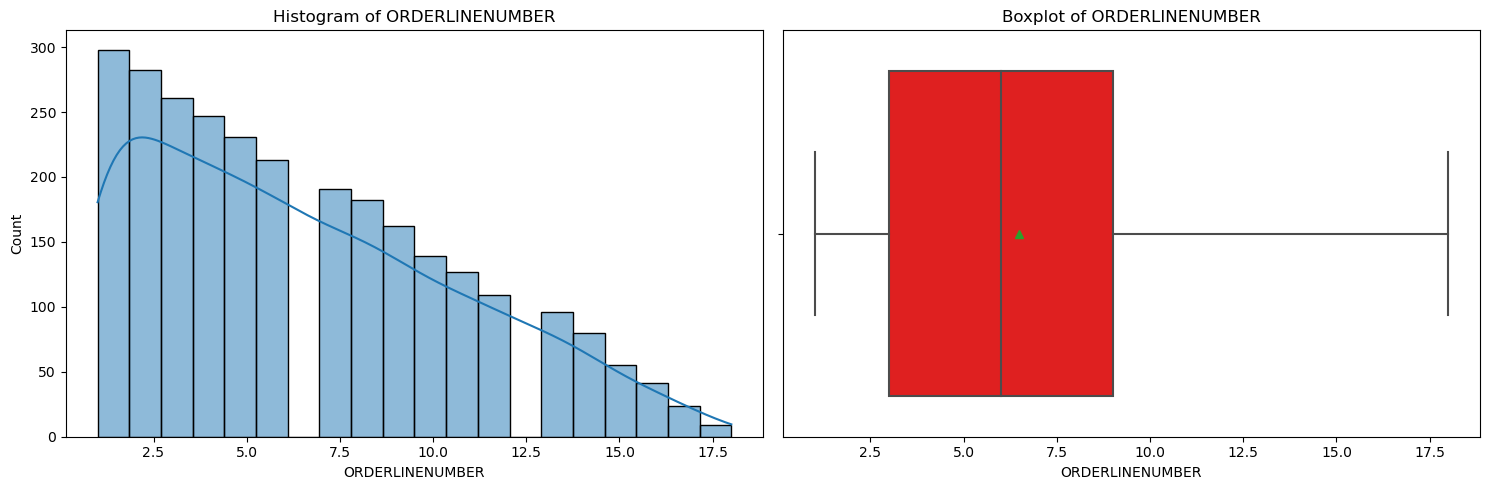

In [38]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot histogram
sns.histplot(df['ORDERLINENUMBER'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of ORDERLINENUMBER')

# Plot boxplot
sns.boxplot(x=df['ORDERLINENUMBER'], ax=axes[1], showmeans=True, color='red')
axes[1].set_title('Boxplot of ORDERLINENUMBER')

plt.tight_layout()
plt.show()

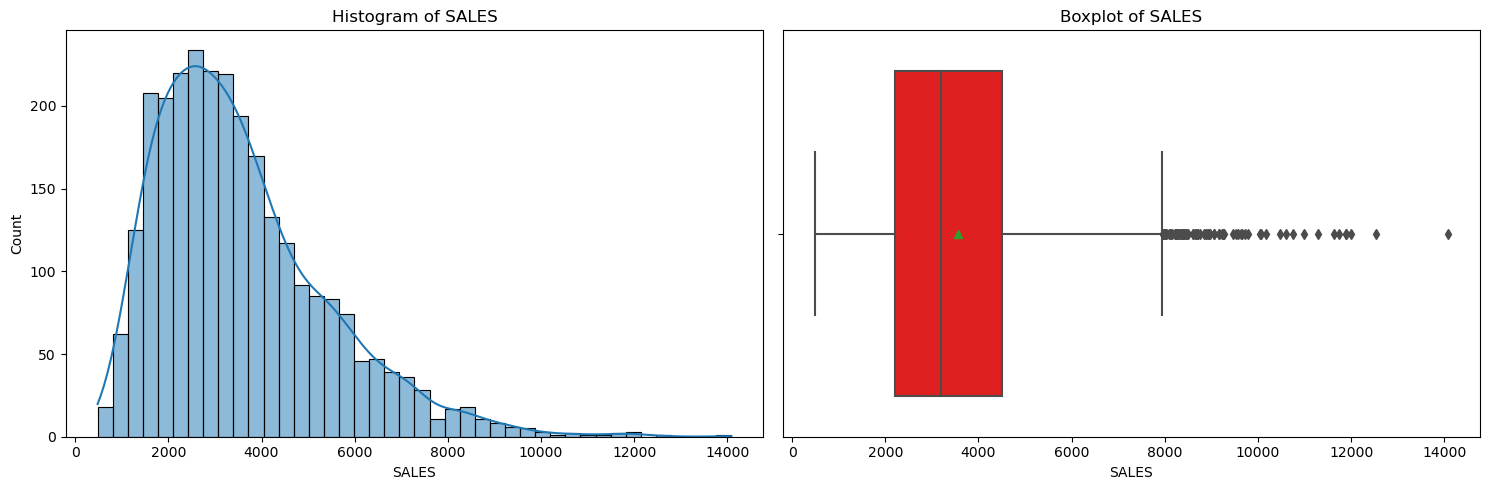

In [39]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot histogram
sns.histplot(df['SALES'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of SALES')

# Plot boxplot
sns.boxplot(x=df['SALES'], ax=axes[1], showmeans=True, color='red')
axes[1].set_title('Boxplot of SALES')

plt.tight_layout()
plt.show()

In [41]:
# Define a function to calculate outliers using IQR method
def detect_outliers(data):
    outliers = pd.DataFrame()
    for col in data.columns:
        if data[col].dtype in ['int64', 'float64']:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[col] = (data[col] < lower_bound) | (data[col] > upper_bound)
    return outliers

# Detect outliers in all numerical columns
outliers = detect_outliers(df)

# Calculate the percentage of outliers in each numerical column
percentage_outliers = (outliers.sum() / len(df)) * 100

# Display percentage of outliers for each numerical column
print("Percentage of outliers for each numerical column:")
print(percentage_outliers)


Percentage of outliers for each numerical column:
ORDERNUMBER             0.000000
QUANTITYORDERED         0.291227
PRICEEACH               1.201311
ORDERLINENUMBER         0.000000
SALES                   2.875865
DAYS_SINCE_LASTORDER    0.000000
MSRP                    0.946487
dtype: float64


1. ORDERNUMBER: There are no outliers in the "ORDERNUMBER" column, which represents the unique identification number assigned to each order. This is expected, as order numbers are typically assigned sequentially and should not have extreme values.

2. QUANTITYORDERED: The "QUANTITYORDERED" column has approximately 0.29% outliers. This could indicate instances where a significantly higher or lower number of items were ordered compared to the typical range. Investigating these outliers may reveal unusual order quantities that could be due to bulk orders or data entry errors.

3.PRICEEACH: Around 1.20% of the data in the "PRICEEACH" column are outliers. This suggests that some items have prices that deviate significantly from the typical price range. Investigating these outliers could identify products with unusually high or low prices, which may require further analysis.

4. ORDERLINENUMBER: Similar to "ORDERNUMBER," there are no outliers in the "ORDERLINENUMBER" column. This column represents the line number of each item within an order, and extreme values are not expected.

5. SALES: The "SALES" column has the highest percentage of outliers, approximately 2.88%. This indicates that some orders have exceptionally high or low sales amounts compared to the typical range. Investigating these outliers may provide insights into large or small orders, which could be due to bulk purchases, promotions, or data anomalies.

6. DAYS_SINCE_LASTORDER: There are no outliers in the "DAYS_SINCE_LASTORDER" column, which represents the number of days that have passed since the last order for each customer. This suggests that the distribution of days since the last order is within the expected range.

7. MSRP: Approximately 0.95% of the data in the "MSRP" column are outliers. This could indicate products with suggested retail prices that deviate significantly from the typical range. Investigating these outliers may reveal products with unusually high or low manufacturer's suggested retail prices.

In summary, while some numerical columns have outliers, others do not. Investigating these outliers can provide valuable insights into the data distribution and potential anomalies that may require further analysis or action.

Based on the provided percentages of outliers for each numerical column, we can justify that no treatment is required for several reasons:

1. Quantity Ordered and Price Each: These columns have relatively low percentages of outliers, with less than 1% in each case. This suggests that the majority of the data points in these columns fall within a normal range. The presence of outliers in such a small proportion indicates that they are unlikely to significantly impact the overall analysis or conclusions drawn from the data.

2. MSRP (Manufacturer's Suggested Retail Price): Although the "MSRP" column has a relatively higher percentage of outliers compared to Quantity Ordered and Price Each, with approximately 0.95%, it's still a small proportion. Additionally, MSRP values may legitimately vary significantly across different products based on factors such as brand, quality, and market demand. Therefore, the presence of outliers in this column may not necessarily indicate data errors and may be reflective of real-world variability.

3. Sales: The "Sales" column has a higher percentage of outliers compared to other columns, with approximately 2.88%. However, extreme sales values can occur due to various factors such as bulk purchases, promotions, or exceptional transactions. Investigating these outliers further may provide valuable insights into unique sales patterns or customer behavior, rather than being indicative of data errors.

4. Overall Observations: While outliers can sometimes indicate errors or anomalies in the data, they can also represent legitimate extreme values that are important to consider in the analysis. In this case, the relatively low percentages of outliers in most numerical columns suggest that the dataset is generally well-behaved, and the outliers may represent meaningful variations within the data rather than data anomalies.

Therefore, based on the provided observations, it can be justified that no treatment is required for the outliers in the numerical columns of the dataset. Instead, further investigation and analysis of these outliers may provide valuable insights into the underlying patterns and characteristics of the data.

In [48]:
# List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical columns
print("List of categorical variables:")
print(categorical_columns)


List of categorical variables:
['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']


<Axes: xlabel='STATUS', ylabel='count'>

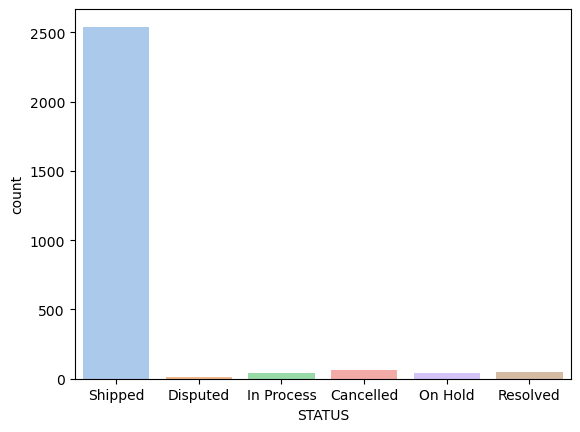

In [52]:
sns.countplot(x='STATUS', data=df, palette='pastel')

STATUS: This variable indicates the status of the order, such as "Shipped," "In Process," "Cancelled," etc. A count plot of order statuses could provide insights into the distribution of different order statuses in the dataset, which may be useful for analyzing order processing efficiency or identifying common issues (e.g., frequent cancellations).

<Axes: xlabel='PRODUCTLINE', ylabel='count'>

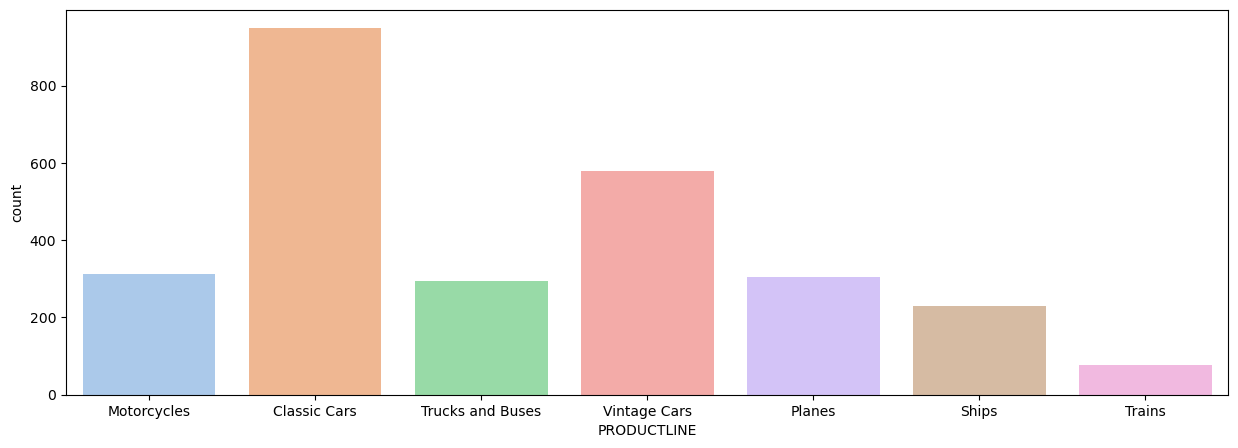

In [57]:
plt.figure(figsize=(15, 5))
sns.countplot(x='PRODUCTLINE', data=df, palette='pastel')

PRODUCTLINE: This variable specifies the product line categories to which each item belongs. A count plot of product lines can help visualize the distribution of products across different lines, providing insights into the popularity or diversity of product offerings.

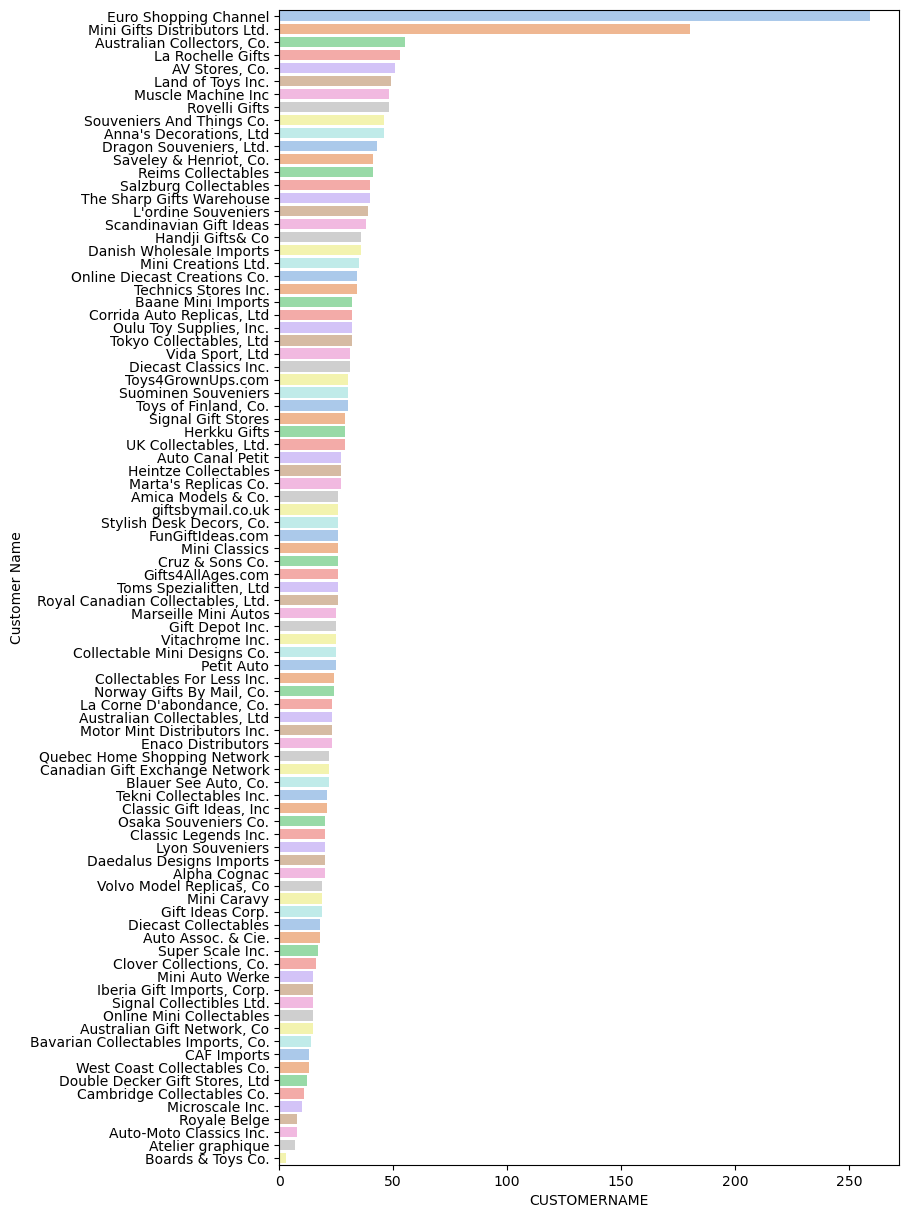

In [9]:
# Set the size of the plot
plt.figure(figsize=(8, 15))  # Adjust the figure size as needed

# Create the count plot with transposed axes
countplot = sns.barplot(x=df['CUSTOMERNAME'].value_counts(), y=df['CUSTOMERNAME'].value_counts().index, palette='pastel')
countplot.set_ylabel('Customer Name')  # Set the y-axis label

# Show the plot
plt.show()


<Axes: xlabel='DEALSIZE', ylabel='count'>

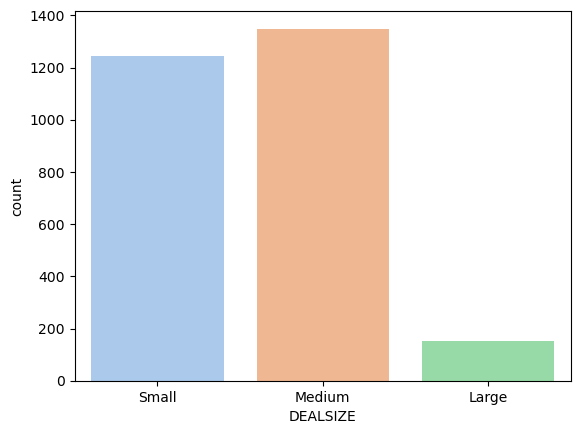

In [69]:
sns.countplot(x='DEALSIZE', data=df, palette='pastel')

DEALSIZE: This variable indicates the size of the deal or order, categorized as "Small," "Medium," or "Large." A count plot of deal sizes can provide insights into the distribution of order sizes in the dataset, which may be useful for understanding customer preferences or identifying trends in deal sizes.

ADDRESSLINE1, CITY, POSTALCODE, COUNTRY: These variables represent components of the customer's address. While a count plot of these variables may show the distribution of customers across different geographic regions, it may not provide actionable insights unless specific geographic patterns are of interest. So they will be futher analysed on tableau.

## Bivariate Analysis

Numeric vs Numeric

SALES and QUANTITYORDERED: These two variables represent sales-related metrics. SALES represents the total sales amount for each order, while QUANTITYORDERED indicates the number of items ordered in each order. Analyzing the relationship between SALES and QUANTITYORDERED could provide insights into how the number of items ordered impacts the total sales amount.

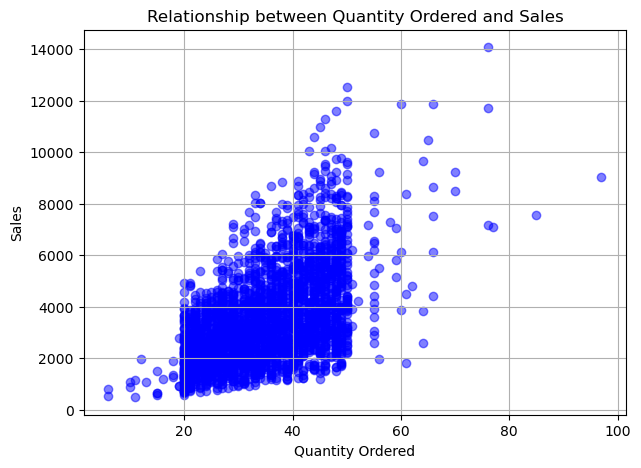

In [10]:
# Create a scatter plot for SALES and QUANTITYORDERED
plt.figure(figsize=(7, 5))
plt.scatter(df['QUANTITYORDERED'], df['SALES'], alpha=0.5, color='blue')
plt.title('Relationship between Quantity Ordered and Sales')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


In [72]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value for SALES and QUANTITYORDERED
correlation_sales_quantity, p_value_sales_quantity = pearsonr(df['QUANTITYORDERED'], df['SALES'])

print("Correlation between SALES and QUANTITYORDERED:", correlation_sales_quantity)
print("P-value:", p_value_sales_quantity)


Correlation between SALES and QUANTITYORDERED: 0.5533586729689346
P-value: 3.3754734912934895e-220


The correlation coefficient of approximately 0.5534 between SALES and QUANTITYORDERED suggests a moderate positive linear relationship. The p-value associated with this correlation coefficient is approximately 3.375 x 10^-220, which is significantly smaller than commonly used significance levels (e.g., 0.05). This extremely small p-value suggests that the observed correlation is statistically significant, implying that as the quantity ordered increases, sales tend to increase as well.

PRICEEACH and MSRP: These variables represent pricing information. PRICEEACH specifies the price of each item in the order, while MSRP (Manufacturer's Suggested Retail Price) represents the suggested selling price for each item. Analyzing the relationship between PRICEEACH and MSRP could provide insights into pricing strategies and potential deviations from suggested retail prices.

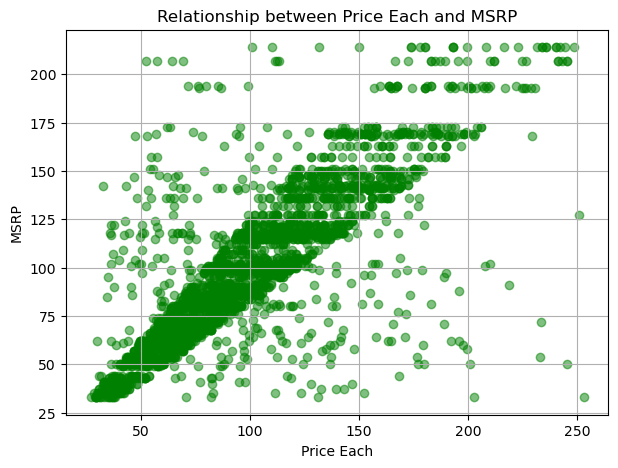

In [11]:
# Create a scatter plot for PRICEEACH and MSRP
plt.figure(figsize=(7, 5))
plt.scatter(df['PRICEEACH'], df['MSRP'], alpha=0.5, color='green')
plt.title('Relationship between Price Each and MSRP')
plt.xlabel('Price Each')
plt.ylabel('MSRP')
plt.grid(True)
plt.show()


In [73]:
# Calculate Pearson correlation coefficient and p-value for PRICEEACH and MSRP
correlation_price_msrp, p_value_price_msrp = pearsonr(df['PRICEEACH'], df['MSRP'])

print("Correlation between PRICEEACH and MSRP:", correlation_price_msrp)
print("P-value:", p_value_price_msrp)


Correlation between PRICEEACH and MSRP: 0.7783932216239957
P-value: 0.0


The correlation coefficient of approximately 0.7784 between PRICEEACH and MSRP indicates a strong positive linear relationship. The p-value of 0.0 suggests that this relationship is highly statistically significant, indicating that as the price each increases, the manufacturer's suggested retail price (MSRP) tends to increase as well.

## Categorical vs Categorical

PRODUCTLINE and STATUS:

Justification: This combination allows us to analyze the distribution of different product lines based on their status. For example, we can explore whether certain product lines have a higher proportion of orders with specific statuses like "Shipped," "In Process," or "Cancelled." This comparison can provide valuable insights into the performance of different product lines in terms of order fulfillment and customer satisfaction.

<Axes: xlabel='PRODUCTLINE', ylabel='count'>

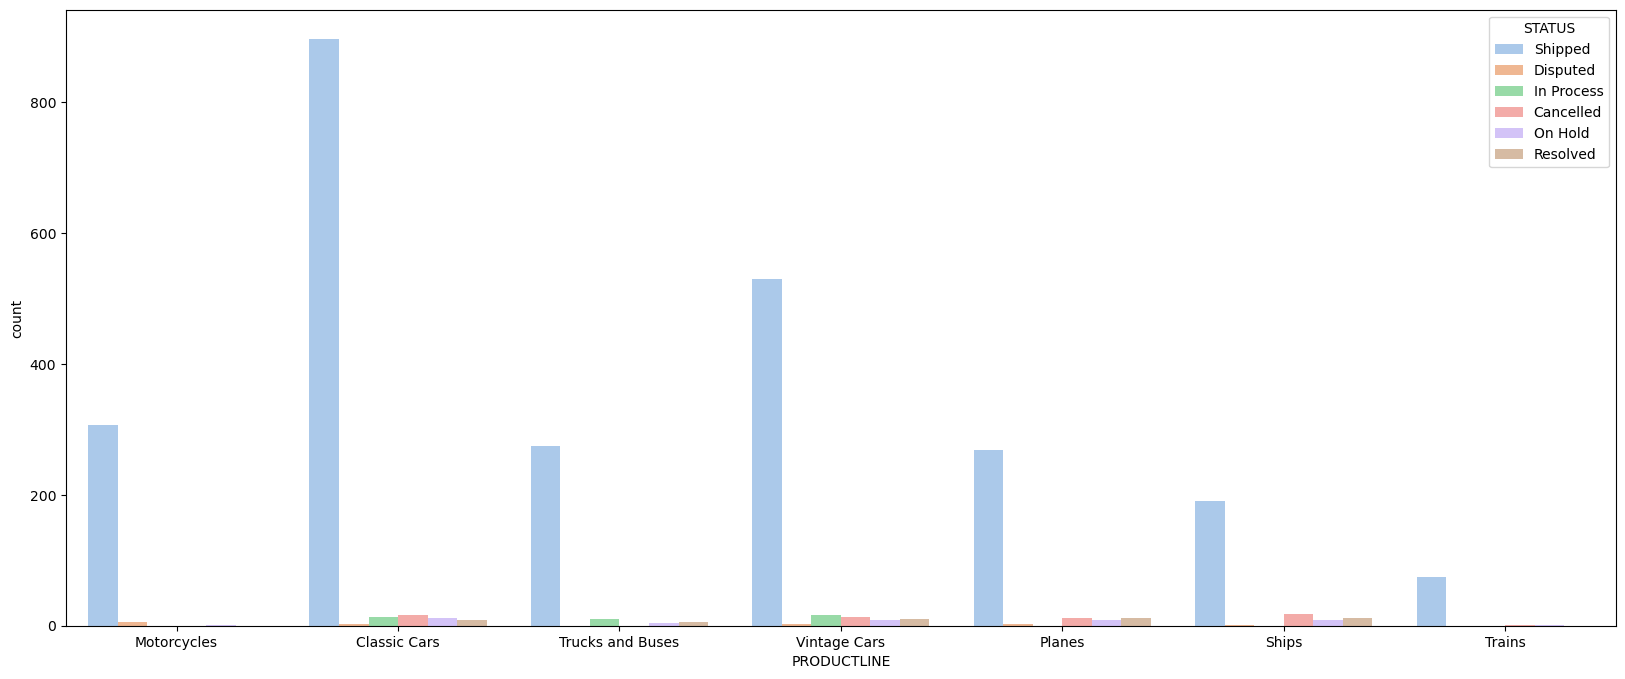

In [82]:
# Set the figure size
plt.figure(figsize=(20, 8))
sns.countplot(x='PRODUCTLINE', hue='STATUS', data=df, palette='pastel')


COUNTRY and DEALSIZE:

Justification: This combination enables us to examine the distribution of deal sizes across different countries. By visualizing how deal sizes vary among customers from different countries, we can identify any geographical patterns or preferences in purchasing behavior. This analysis can help tailor marketing strategies and product offerings to better cater to the preferences of customers in specific regions.

<Axes: xlabel='COUNTRY', ylabel='count'>

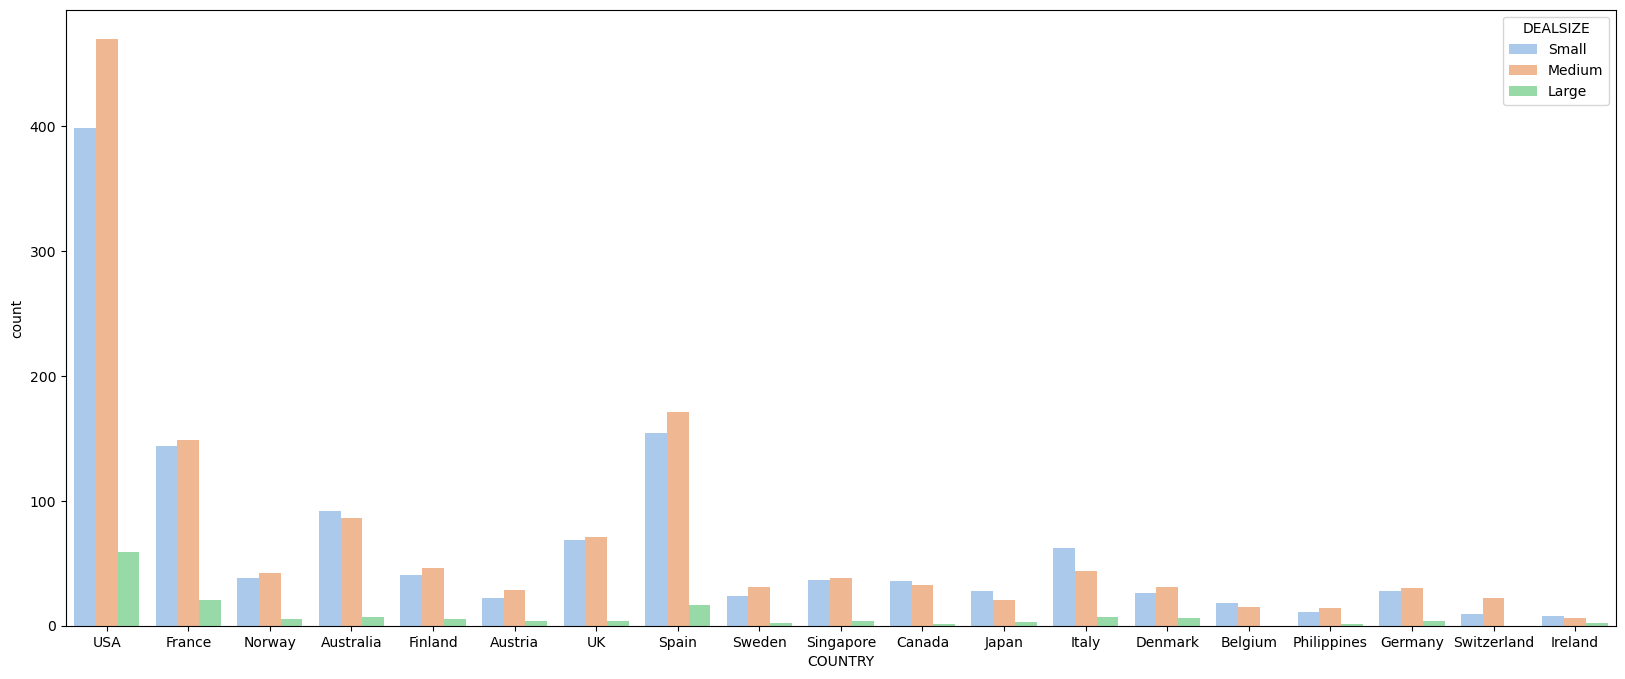

In [81]:
# Set the figure size
plt.figure(figsize=(20, 8))
sns.countplot(x='COUNTRY', hue='DEALSIZE', data=df, palette='pastel')


PRODUCTLINE and DEALSIZE:
Justification: This combination allows us to explore the distribution of deal sizes across different product lines. By visualizing the count of each deal size category within each product line, we can gain insights into which product lines tend to attract larger or smaller deals. This analysis can inform marketing and sales strategies tailored to specific product lines.

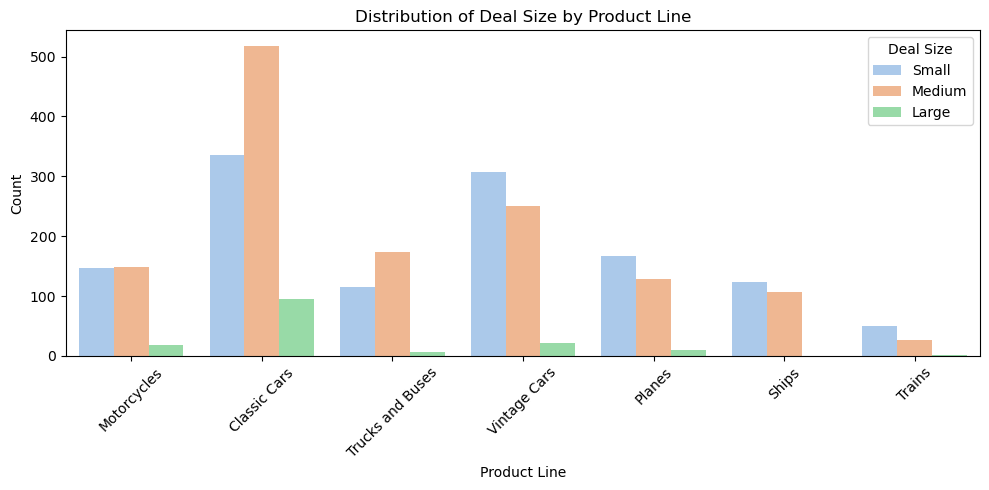

In [12]:
# Set the figure size
plt.figure(figsize=(10 , 5))

# Create the count plot for PRODUCTLINE and DEALSIZE
sns.countplot(x='PRODUCTLINE', hue='DEALSIZE', data=df, palette='pastel')

# Add labels and title
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.title('Distribution of Deal Size by Product Line')

# Show the plot
plt.legend(title='Deal Size', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [74]:
# Create a cross-tabulation of PRODUCTLINE and DEALSIZE
cross_tab = pd.crosstab(df['PRODUCTLINE'], df['DEALSIZE'])

# Display the cross-tabulation
print(cross_tab)


DEALSIZE          Large  Medium  Small
PRODUCTLINE                           
Classic Cars         95     518    336
Motorcycles          18     148    147
Planes                9     128    167
Ships                 0     106    124
Trains                1      26     50
Trucks and Buses      7     173    115
Vintage Cars         22     250    307


1. **Classic Cars**:
   - The majority of deals fall into the "Medium" category, followed by "Small" and then "Large."
   - This suggests that customers purchasing classic cars tend to make medium-sized deals more frequently.

2. **Motorcycles**:
   - Similar to classic cars, the "Medium" deal size is the most common, followed closely by "Small."
   - However, there's a noticeable decrease in the frequency of "Large" deals for motorcycles.

3. **Planes**:
   - The distribution is relatively balanced across all deal sizes, with a slightly higher proportion of "Medium" deals.
   - This indicates that customers purchasing planes tend to make deals of varying sizes.

4. **Ships**:
   - Similar to planes, the distribution is relatively balanced across all deal sizes, with a slight preference towards "Medium" deals.
   - There are no "Large" deals for ships in the provided data.

5. **Trains**:
   - The majority of deals are either "Medium" or "Small," with very few "Large" deals.
   - This suggests that customers purchasing trains tend to make smaller deals.

6. **Trucks and Buses**:
   - Similar to classic cars and motorcycles, the most common deal size is "Medium."
   - However, there is a higher proportion of "Large" deals compared to motorcycles and classic cars.

7. **Vintage Cars**:
   - Again, the "Medium" deal size is the most common, followed by "Small" and then "Large."
   - Similar to classic cars, customers purchasing vintage cars tend to make medium-sized deals more frequently.

Overall, there are variations in the distribution of DEALSIZE across different PRODUCTLINE categories, indicating that customer preferences for deal sizes may vary depending on the type of product being purchased.

The analysis reveals interesting insights into the distribution of deal sizes across various product lines:

1. **Preference Variation**: There is notable variation in deal size preferences across different product lines. For instance, while medium-sized deals are predominant across multiple product lines such as classic cars, motorcycles, and vintage cars, other product lines like ships and trains tend to have a higher proportion of smaller deals.

2. **Market Segmentation**: The distribution of deal sizes can provide insights into market segmentation. Understanding which product lines attract larger or smaller deals can help the company tailor their marketing strategies and product offerings to different customer segments.

3. **Product Demand**: The distribution of deal sizes may reflect the demand for specific products within each product line. For instance, the higher proportion of medium-sized deals for classic cars and vintage cars may indicate strong demand for these products in the market.

4. **Business Strategy**: The company can use these insights to optimize their business strategy, such as pricing strategies, inventory management, and sales tactics, based on the observed preferences and behaviors of customers across different product lines.

Overall, by analyzing the distribution of deal sizes across various product lines, the company can gain valuable insights that can inform strategic decision-making and enhance their overall competitiveness in the market.

In [75]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = [[95, 518, 336],
                     [18, 148, 147],
                     [9, 128, 167],
                     [0, 106, 124],
                     [1, 26, 50],
                     [7, 173, 115],
                     [22, 250, 307]]

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistics and p-value
print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 131.91030309098508
p-value: 2.551396229653178e-22


The chi-square statistic measures the strength of association between DEALSIZE and PRODUCTLINE. A larger chi-square value indicates a stronger association.
The p-value is the probability of observing the data or more extreme results under the assumption that the null hypothesis is true. In this case, the null hypothesis is that there is no association between DEALSIZE and PRODUCTLINE.
With such a small p-value (much less than the common significance level of 0.05), we reject the null hypothesis. This means that there is a statistically significant association between DEALSIZE and PRODUCTLINE.
In other words, the distribution of DEALSIZE varies significantly across different PRODUCTLINE categories. There is evidence to suggest that the proportion of DEALSIZE categories (Large, Medium, Small) differs significantly depending on the PRODUCTLINE.
Overall, based on the low p-value, we conclude that there is a significant association between DEALSIZE and PRODUCTLINE.

The significant association between DEALSIZE and PRODUCTLINE indicates that the distribution of deal sizes (Large, Medium, Small) varies significantly across different product lines. This insight suggests that customers' preferences for deal sizes may differ depending on the type of product they are purchasing.

Here are some potential insights and implications:

1. **Product Line Preferences**: Certain product lines may attract customers who prefer larger deals, while others may appeal to those who prefer smaller or medium-sized deals. Understanding these preferences can help tailor marketing and promotional strategies to each product line's target audience.

2. **Market Segmentation**: The significant association between deal size and product line can inform market segmentation strategies. By analyzing the characteristics and preferences of customers within each product line segment, the company can create targeted marketing campaigns and offers to maximize sales and customer satisfaction.

3. **Inventory Management**: Knowing which product lines are associated with larger deal sizes can help optimize inventory management. The company can adjust its stock levels and procurement strategies to meet the demand for different deal sizes across product lines effectively.

4. **Price Sensitivity**: The association between deal size and product line may also reflect varying levels of price sensitivity among customers. Some product lines may have customers who are more price-sensitive and prefer larger deals, while others may prioritize product quality over deal size.

5. **Promotional Strategies**: Based on the association between deal size and product line, the company can design targeted promotional strategies to capitalize on customers' preferences. For example, offering exclusive discounts or bundled deals tailored to each product line's customer base can help drive sales and customer loyalty.

Overall, understanding the relationship between deal size and product line enables the company to tailor its marketing, pricing, and inventory management strategies to meet the diverse preferences and needs of its customer segments across different product lines.

Categorical vs Numeric

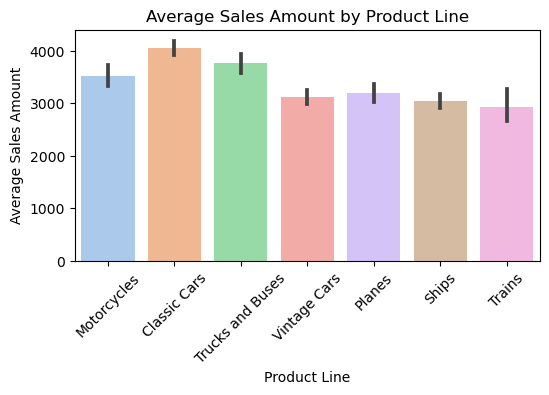

In [85]:

# Set the size of the plot
plt.figure(figsize=(6, 3))

# Create a bar plot of average sales amount for each product line
sns.barplot(x='PRODUCTLINE', y='SALES', data=df, palette='pastel')
plt.title('Average Sales Amount by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Sales Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()


Understanding sales performance across different product categories is crucial for strategic decision-making and resource allocation. It helps identify profitable product lines, tailor marketing strategies to meet customer preferences, and stay competitive in the market. Insights into sales performance also inform inventory management and forecasting, ensuring efficient operations and maximizing profitability.

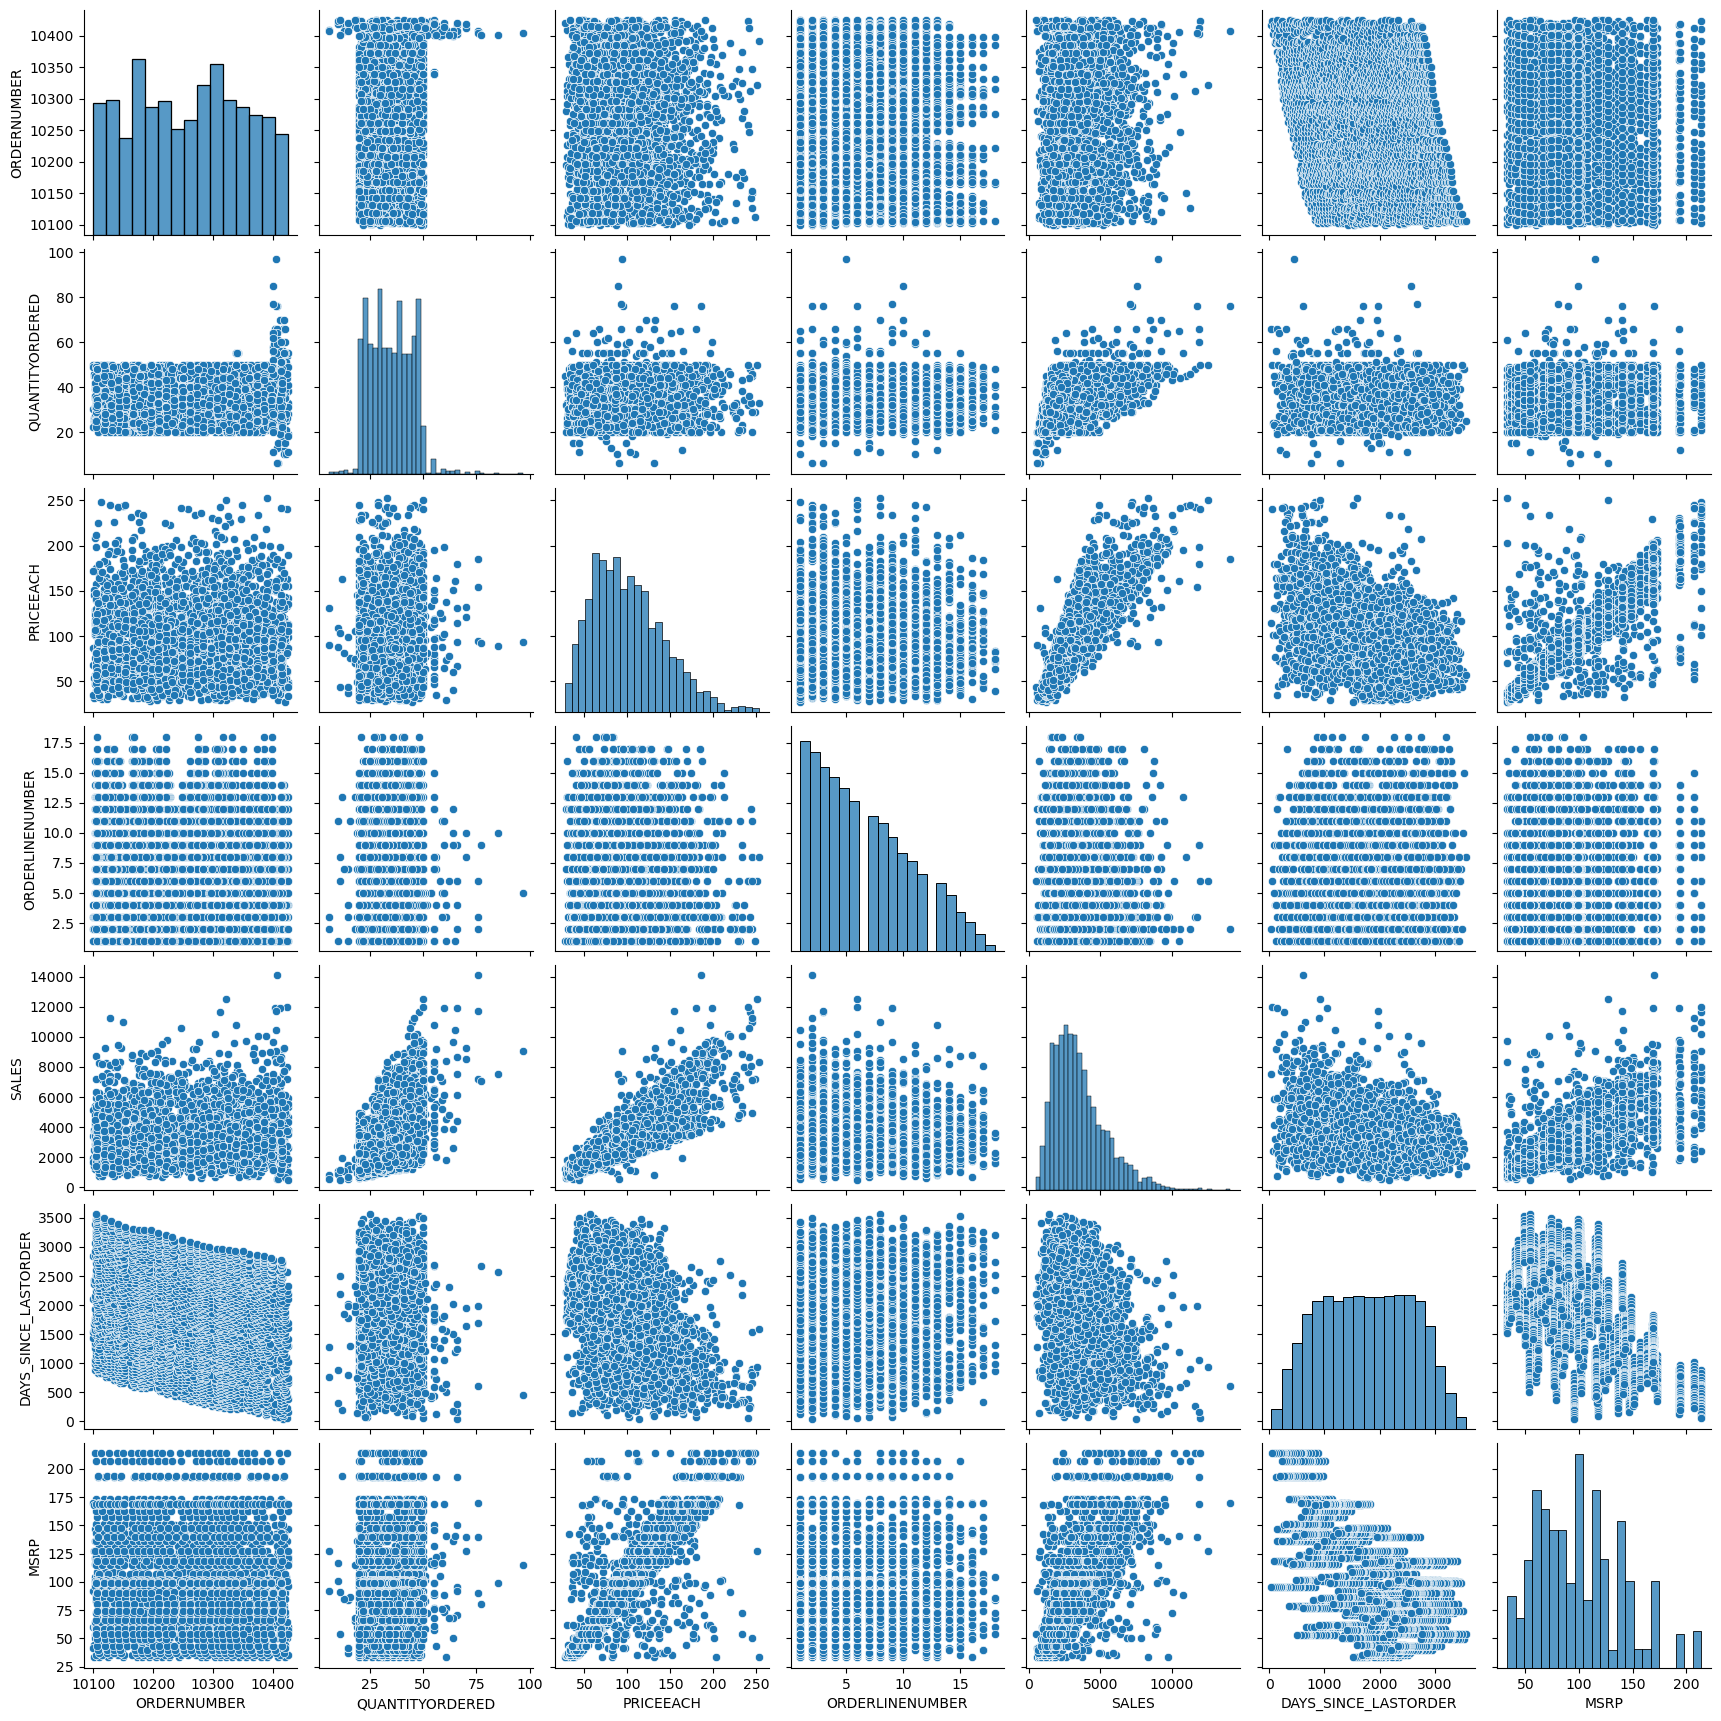

In [86]:
sns.pairplot(df)

In [15]:
correlation_matrix = df.corr()
print(correlation_matrix)



                      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  \
ORDERNUMBER              1.000000         0.067110  -0.003369   
QUANTITYORDERED          0.067110         1.000000   0.010161   
PRICEEACH               -0.003369         0.010161   1.000000   
ORDERLINENUMBER         -0.054300        -0.016295  -0.052646   
SALES                    0.037289         0.553359   0.808287   
ORDERDATE                0.982862         0.059549  -0.006688   
DAYS_SINCE_LASTORDER    -0.251476        -0.021923  -0.397092   
MSRP                    -0.013910         0.020551   0.778393   

                      ORDERLINENUMBER     SALES  ORDERDATE  \
ORDERNUMBER                 -0.054300  0.037289   0.982862   
QUANTITYORDERED             -0.016295  0.553359   0.059549   
PRICEEACH                   -0.052646  0.808287  -0.006688   
ORDERLINENUMBER              1.000000 -0.057414  -0.045635   
SALES                       -0.057414  1.000000   0.030891   
ORDERDATE                   -0.045635  0.0

C:\Users\lavan\AppData\Local\Temp\ipykernel_18560\4242536340.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


C:\Users\lavan\AppData\Local\Temp\ipykernel_18560\340607876.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=".2f");


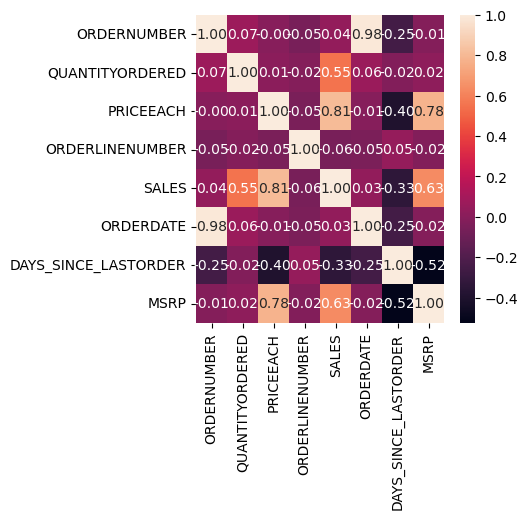

In [13]:
plt.figure(figsize=(4,4))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

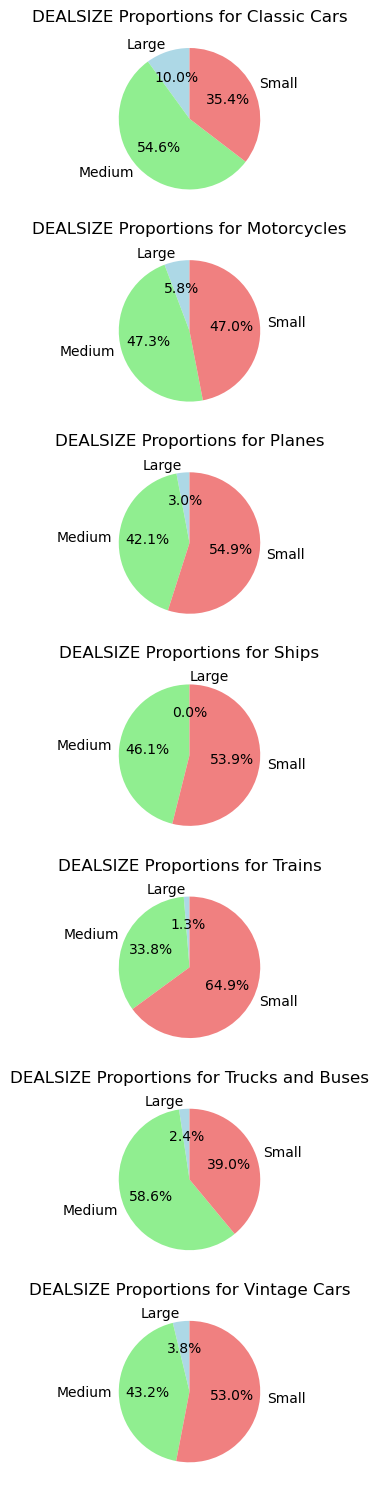

In [103]:
import matplotlib.pyplot as plt

# Set up subplots with larger figure size
fig, axes = plt.subplots(nrows=len(row_proportions), ncols=1, figsize=(12, 15))

# Plot pie charts for each row
for i, (index, row) in enumerate(row_proportions.iterrows()):
    ax = axes[i]
    ax.pie(row, labels=row.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
    ax.set_title(f'DEALSIZE Proportions for {index}')

plt.tight_layout()
plt.show()


Analyzing the row-wise proportions provides insights into the distribution of deal sizes within each product line category. Here's the interpretation based on the provided data:

1. **Classic Cars**: Approximately 55% of deals fall into the "Medium" deal size category, followed by 35% in the "Small" category and 10% in the "Large" category. Classic Cars tend to have a higher proportion of medium-sized deals compared to other sizes.

2. **Motorcycles**: The distribution of deal sizes for Motorcycles is relatively balanced, with approximately equal proportions across all three categories: "Large," "Medium," and "Small." 

3. **Planes**: A higher proportion of deals for Planes falls into the "Small" category (approximately 55%), followed by the "Medium" category (approximately 42%). The "Large" category has the lowest proportion of deals for Planes.

4. **Ships**: Similar to Planes, the majority of deals for Ships are in the "Small" category (approximately 54%), followed by the "Medium" category (approximately 46%). There are no deals categorized as "Large" for Ships.

5. **Trains**: Trains have a notable skew towards the "Small" deal size category, with approximately 65% of deals falling into this category. The proportion of deals in the "Medium" and "Large" categories is relatively smaller.

6. **Trucks and Buses**: Trucks and Buses exhibit a balanced distribution across deal sizes, with approximately equal proportions across all three categories. 

7. **Vintage Cars**: Vintage Cars have a relatively balanced distribution across deal sizes, with approximately equal proportions across all three categories.

Overall, analyzing the row-wise proportions helps identify variations in deal size distributions across different product lines, providing valuable insights into customer preferences and purchase behaviors within each product category.

Analyzing the row-wise proportions provides insights into the distribution of deal sizes within each product line category. For instance, Classic Cars tend to have a higher proportion of medium-sized deals (55%), followed by small-sized deals (35%) and large-sized deals (10%). In contrast, Vintage Cars exhibit a more balanced distribution across deal sizes, with approximately equal proportions across all three categories. These observations can guide various business strategies:

1. **Tailoring Marketing Strategies**: Understanding deal size distributions within each product line helps tailor marketing strategies. For product lines like Classic Cars and Trains, which attract customers seeking smaller deals, targeted promotions offering discounts or bundled deals may be effective.

2. **Product Line Expansion Opportunities**: Identifying product lines with a higher proportion of large deal sizes, such as Vintage Cars, presents opportunities for expanding product offerings or introducing premium packages tailored to customers seeking larger deals.

3. **Inventory Management Optimization**: Insights into deal size distributions aid in optimizing inventory management by ensuring adequate stock levels for products associated with certain deal sizes. For example, understanding that Trucks and Buses attract a balanced distribution of deal sizes can optimize inventory levels.

4. **Customer Segmentation**: Utilizing deal size preferences for customer segmentation facilitates personalized marketing approaches. Categorizing customers based on their deal size preferences enables tailored product offerings to meet diverse customer needs.

5. **Promotional Campaign Design**: Designing promotional campaigns aligned with prevalent deal size preferences within each product line enhances campaign effectiveness. For instance, campaigns highlighting small-sized deals may be more impactful for product lines like Planes and Ships, where the majority of deals fall into the small category.

By leveraging these actionable insights, the automobile parts manufacturing company can enhance marketing strategies, product offerings, and inventory management practices to better meet customer needs and drive business growth.

## Multivariate Analysis

PRODUCTLINE: This categorical variable divides the data into distinct groups based on different product lines. Analyzing sales across different product lines can provide insights into the performance of each product category and identify potential areas for improvement.
SALES: The numerical variable of interest, as it represents the outcome or metric being analyzed. Examining sales amounts allows us to understand the distribution of revenue across different product lines and identify any significant differences or patterns.
DEALSIZE: Introducing deal size as the hue variable allows us to further analyze how the distribution of sales amounts varies within each product line category, considering different deal sizes. This adds another layer of understanding and helps identify whether certain deal sizes are more prevalent or influential within specific product lines.

This multivariate analysis using box plots allows us to visually compare the distribution of sales amounts across different product lines. By examining the box plots, we can identify variations in sales performance between product categories, outliers, and any potential trends or patterns that may inform business decisions and strategies. This analysis helps prioritize resources, optimize marketing efforts, and improve overall business performance.

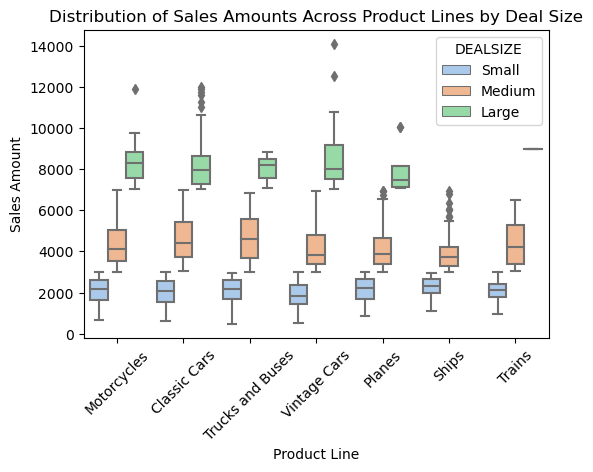

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(6, 4))

# Create a box plot of sales amounts for each product line with deal size as hue
sns.boxplot(x='PRODUCTLINE', y='SALES', hue='DEALSIZE', data=df, palette='pastel')
plt.title('Distribution of Sales Amounts Across Product Lines by Deal Size')
plt.xlabel('Product Line')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()


Incorporating deal size as the hue in the box plot enriches analysis by revealing sales distributions within product lines across different deal sizes. This approach facilitates a more detailed comparison of sales trends within each product category, aiding in strategic decision-making. By considering both product lines and deal sizes, businesses gain actionable insights to tailor marketing strategies and optimize revenue generation. The multivariate analysis offers a comprehensive understanding of sales performance, guiding efforts to maximize profitability and market effectiveness.

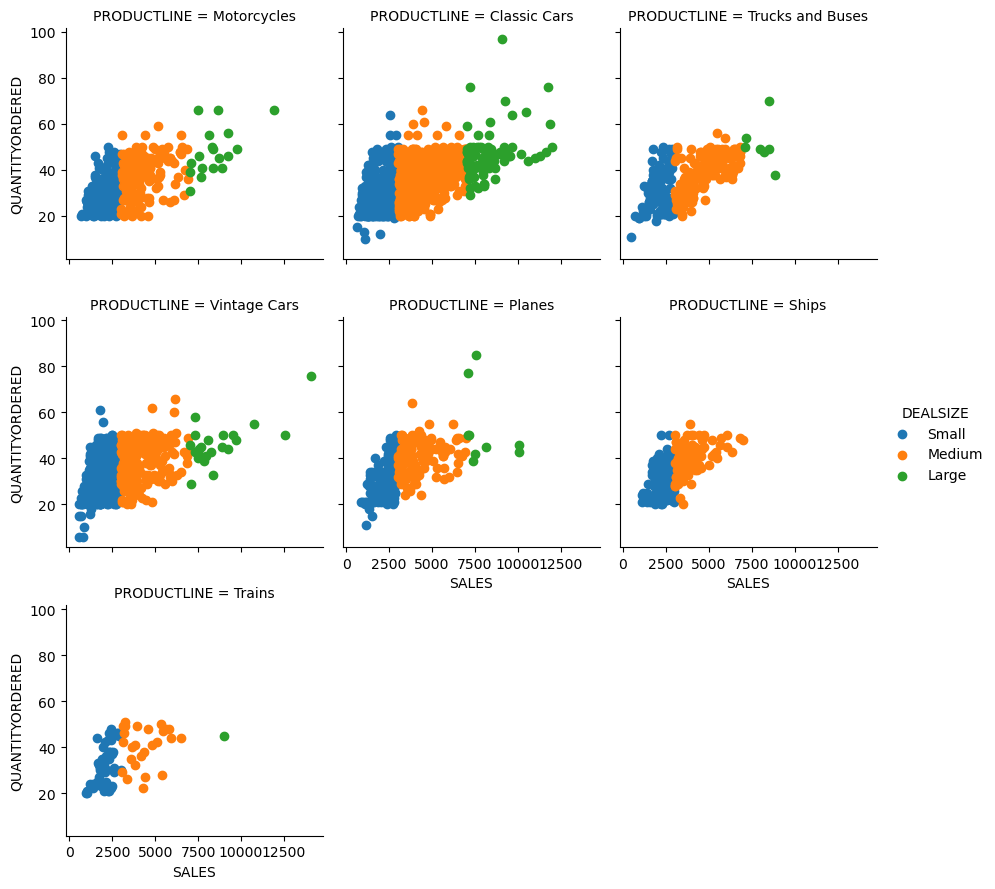

In [95]:
# Create a FacetGrid for multivariate analysis
g = sns.FacetGrid(df, col="PRODUCTLINE", hue='DEALSIZE', col_wrap=3, height=3)
g = g.map(plt.scatter, "SALES", 'QUANTITYORDERED')

# Add legend
g.add_legend()

# Show the plot
plt.show()
